<a href="https://colab.research.google.com/github/polarbeariceskating/KonsepData-AI/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#unduh dataset dari kaggle
#memerlukan kaggle.json untuk mendapatkan akses ke kaggle
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#unduh dataset
!kaggle datasets download -d shineucc/bbc-news-dataset

  0% 0.00/2.07M [00:00<?, ?B/s]
100% 2.07M/2.07M [00:00<00:00, 154MB/s]


In [3]:
#ekstrasi dataset yang sudah diunduh
!unzip bbc-news-dataset.zip

Archive:  bbc-news-dataset.zip
  inflating: BBC news dataset.csv    


In [11]:
# import pustaka
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import  numpy as np
from PIL import Image
import requests

In [12]:
# baca data  dari file CSV yang disebut "BBC news dataset.csv" menggunakan pandas
data = pd.read_csv("BBC news dataset.csv", encoding ="utf-8")
print(data.head())

   Unnamed: 0                                        description  \
0           0  chelsea sack mutu  chelsea have sacked adrian ...   
1           1  record fails to lift lacklustre meet  yelena i...   
2           2  edu describes tunnel fracas  arsenals edu has ...   
3           3  ogara revels in ireland victory  ireland flyha...   
4           4  unclear future for striker baros  liverpool fo...   

                                                tags  
0  sports, stamford bridge, football association,...  
1  sports, madrid, birmingham, france, scotland, ...  
2  sports, derby, brazil, tunnel fracasedu, food,...  
3  sports, bbc, united kingdom, ireland, brian o'...  
4  sports, liverpool, daily sport, millennium sta...  


In [13]:
# melakukan pemrosesan teks pada kolom "description" dari dataset.
# menciptakan variabel comment_words yang berisi semua kata-kata dari deskripsi berita yang akan digunakan untuk membuat word cloud
# stopwords (kata-kata umum yang akan diabaikan dalam word cloud) diatur dalam variabel stopwords.
comment_words = ''
stopwords = set(STOPWORDS)

for val in data.description:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

In [16]:
# memasukan gambar dan mengonversinya menjadi array NumPy agar bisa digunakan sebagai mask untuk word cloud
pic = np.array(Image.open('va2.PNG'))


# membuat objek wordcloud dengan pengaturan lebar, tinggi, warna latar belakang, stopwords, mask (menggunakan gambar di url), dan ukuran font minimum.
# Kemudian, metode generate digunakan untuk membuat word cloud berdasarkan teks dalam comment_words.
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords, mask = pic,
                min_font_size = 10).generate(comment_words)

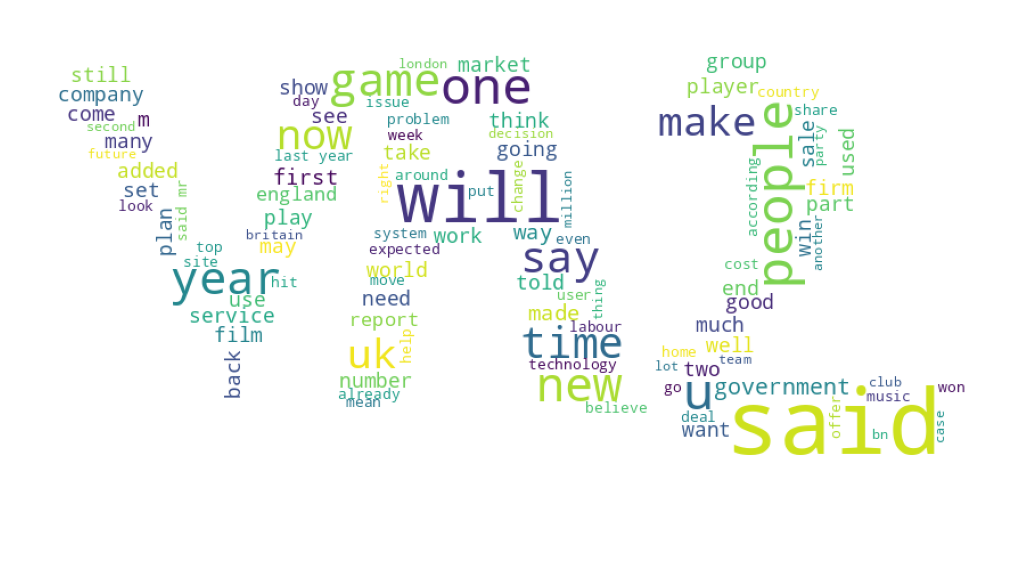

In [17]:
# embuat plot word cloud. Anda mengatur ukuran plot, warna latar belakang, dan tampilan word cloud.
# Hasilnya adalah visualisasi word cloud yang menampilkan kata-kata yang paling umum dalam deskripsi berita dari dataset.

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()